EN ESTA NOTEBOOK PRESENTO EL PROCESO DE LIMPIEZA DE DATOS Y POSTERIOR ANALISIS DE UN DATASET CON INFORMACION DE LA CARRERA PROFESIONAL TENIENDO EN CUENTA GOLES DEL JUGADOR ROBERT LEWANDOWSKI.
PORQUE ESPECIFICAMENTE DE LEWANDOWSKI Y NO DE CUALQUIER OTRO JUGADOR DE ELITE?

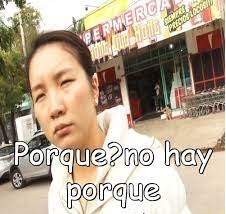

IMPORTO LIBRERIAS NECESARIAS

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

LEVANTO EL CSV

In [46]:
lewandowskiDF = pd.read_csv('https://raw.githubusercontent.com/cristiandarioortegayubro/base/main/dataset/lewandowskiSucio.csv')

PRIMEROS ANALISIS PARA REVISAR CON QUE CANTIDAD DE REGISTROS Y COLUMNAS CONTAMOS ASI COMO CUANTOS REGISTROS NULOS O DUPLICADOS TENEMOS.

In [47]:
lewandowskiDF.shape

(612, 13)

In [48]:
lewandowskiDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tournament    536 non-null    object
 1   Matchday      536 non-null    object
 2   Date          536 non-null    object
 3   Venue         536 non-null    object
 4   Club          536 non-null    object
 5   Opponent      536 non-null    object
 6   Result        536 non-null    object
 7   Position      536 non-null    object
 8   Minute        536 non-null    object
 9   When Scored   536 non-null    object
 10  Goal Type     536 non-null    object
 11  Assist        536 non-null    object
 12  Nacionalidad  536 non-null    object
dtypes: object(13)
memory usage: 62.3+ KB


In [49]:
lewandowskiDF.isnull().any()

Tournament      True
Matchday        True
Date            True
Venue           True
Club            True
Opponent        True
Result          True
Position        True
Minute          True
When Scored     True
Goal Type       True
Assist          True
Nacionalidad    True
dtype: bool

In [50]:
lewandowskiDF.duplicated().any()

True

DROPEO LOS REGISTROS EN LOS CUALES TODOS SUS DATOS CONTENIDOS EN LAS COLUMNAS SON NULOS Y TAMBIEN ELIMINO LOS REGISTROS DUPLICADOS.

In [51]:
lewandowskiDF.dropna(how='all', inplace=True)

In [52]:
lewandowskiDF.drop_duplicates(inplace=True)

A CONTINUACION PODEMOS OBSERVAR QUE EL DATAFRAME ORIGINAL POSEIA 612 REGISTROS Y LUEGO DE ELIMINAR NULOS Y DUPLICADOS NOS QUEDO UN DATASET DE 505 REGISTROS.

In [53]:
lewandowskiDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 504
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tournament    505 non-null    object
 1   Matchday      505 non-null    object
 2   Date          505 non-null    object
 3   Venue         505 non-null    object
 4   Club          505 non-null    object
 5   Opponent      505 non-null    object
 6   Result        505 non-null    object
 7   Position      505 non-null    object
 8   Minute        505 non-null    object
 9   When Scored   505 non-null    object
 10  Goal Type     505 non-null    object
 11  Assist        505 non-null    object
 12  Nacionalidad  505 non-null    object
dtypes: object(13)
memory usage: 55.2+ KB


AHORA QUE LOS DATOS YA ESTAN UN POCO MAS ORGANIZADOS Y LIMPIOS, VEO CUAL ES EL CONTENIDO GENERAL Y LA INFORMACION QUE DETALLAN LAS COLUMNAS DEL DATASET.

In [54]:
lewandowskiDF.head()

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist,Nacionalidad
0,Fortuna 1 Liga,1,7/29/07,Away,Znicz Pruszkow,Pelikan Lowicz,0:2,CF,90',0:2,Not Applicable,Not Applicable,Polaco
1,Fortuna 1 Liga,2,8/5/07,Home,Znicz Pruszkow,Kmita Zabierzów,4:0,CF,77',4:0,Not Applicable,Not Applicable,Polaco
2,Fortuna 1 Liga,22,3/22/08,Away,Znicz Pruszkow,Slask Wroclaw,0:3,CF,24',0:1,Not Applicable,Igor Lewczuk,Polaco
3,Fortuna 1 Liga,22,3/22/08,Away,Znicz Pruszkow,Slask Wroclaw,0:3,CF,56',0:3,Not Applicable,Pawel Kaczmarek,Polaco
4,Fortuna 1 Liga,31,5/11/08,Home,Znicz Pruszkow,Motor Lublin,3:0,CF,35',2:0,Not Applicable,Not Applicable,Polaco


ELIMINO LA COLUMNA NACIONALIDAD, ES INNECESARIA,  EL DATASET SOLO HABLA DE LEWANDOWSKI (ES POLACO!) :P

In [55]:
lewandowskiDF.drop('Nacionalidad', axis=1, inplace=True)

POR LO QUE PODEMOS OBSERVAR PRELIMINARIAMENTE GRACIAS AL .head(), ES QUE HAY ALGUNAS COLUMNAS QUE CONTIENEN DATOS NUMERICOS Y OTRAS CON CARACTERES. PROCEDO A CHEQUEAR EL TIPO DE DATO DE LAS COLUMNAS Y SI ES NECESARIO, REALIZAR ALGUNAS MODIFICACIONES PARA QUE NO HAYA PROBLEMAS A FUTURO CUANDO SE REALICEN LOS ANALISIS.

In [56]:
lewandowskiDF.dtypes

Tournament     object
Matchday       object
Date           object
Venue          object
Club           object
Opponent       object
Result         object
Position       object
Minute         object
When Scored    object
Goal Type      object
Assist         object
dtype: object

In [57]:
lewandowskiDF['Date'] = pd.to_datetime(lewandowskiDF['Date'])

LA COLUMNA 'MINUTE' PARA PASARLA A TIPO INTEGER PRIMERO ELIMINO EL APOSTROFE QUE TIENE CADA REGISTRO AL FINAL. 
LA FUNCION 'pd.to_numeric' ME ARROJABA ERROR A LA HORA DE LA CONVERSION, POR UN UN REGISTRO QUE TENIA OTRO CARACTER "NO NUMERICO" MAS ALLA DEL APOSTROFE. CON EL ARGUMENTO "errors='coerce" FORZE A LA FUNCION QUE IGNORARA ESE REGISTRO.

In [58]:
lewandowskiDF['Minute'] = lewandowskiDF['Minute'].apply(lambda x: str(x).replace("'", ""))

In [59]:
lewandowskiDF['Minute'] = pd.to_numeric(lewandowskiDF['Minute'], errors='coerce')

A CONTINUACION, IRE PRESENTANDO UNA VARIEDAD DE ANALISIS DONDE PODEMOS ENCONTRAR INFORMACION VALIOSA ALOJADA EN ESTE CONJUNTO DE DATOS.


PRIMERO, LOS EQUIPOS EN LOS QUE COMO JUGADOR PROFESIONAL PARTICIPO.

In [60]:
lewandowskiDF['Club'].unique()

array(['Znicz Pruszkow', 'Lech Poznan', 'Borussia Dortmund',
       'Bayern Munich', 'FC Barcelona'], dtype=object)

DE TODOS SUS GOLES, ACA SE PUEDE VER CUAL FUE LA MANERA MAS RECURRENTE DE CONVERTIRLOS.

In [61]:
lewandowskiDF['Goal Type'].value_counts()

Right-footed shot         242
Header                     82
Left-footed shot           81
Penalty                    58
Not Applicable             17
Tap-in                     11
Direct free kick            6
Deflected shot on goal      4
Counter attack goal         2
Long distance kick          1
Chest                       1
Name: Goal Type, dtype: int64

CANTIDAD DE PARTIDOS POR EQUIPO. HACIENDO DISTINCION SI FUERON PARTIDOS DE LOCAL O DE VISITANTE.

In [62]:
lewandowskiDF.groupby(['Club'])['Venue'].value_counts()

Club               Venue
Bayern Munich      Home     188
                   Away     156
Borussia Dortmund  Home      59
                   Away      44
FC Barcelona       Home       7
                   Away       5
Lech Poznan        Away      21
                   Home      20
Znicz Pruszkow     Away       3
                   Home       2
Name: Venue, dtype: int64

PROMEDIO DE GOLES POR TORNEO

In [63]:
lewandowskiDF.groupby(['Tournament']).mean()

<ipython-input-63-ca52c5cd4117>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lewandowskiDF.groupby(['Tournament']).mean()


,Minute
Tournament,
Bundesliga,48.301695
Champions League,48.886364
Club World Cup,51.000000
DFB-Pokal,47.289474
DFL-Supercup,44.142857
Ekstraklasa,48.125000
Europa League,89.000000
Europa League Qualifying,57.000000
Fortuna 1 Liga,56.400000


A QUE OPONENTE MAS VECES LE CONVIRTIO.

In [64]:
lewandowskiDF['Opponent'].value_counts()

Borussia Dortmund    27
VfL Wolfsburg        26
FC Augsburg          23
FC Schalke 04        21
SV Werder Bremen     20
                     ..
FC Nöttingen          1
SV Darmstadt 98       1
Juventus FC           1
FK Rostov             1
RCD Mallorca          1
Name: Opponent, Length: 99, dtype: int64

SU MAXIMO ASISTENTE.

In [65]:
lewandowskiDF['Assist'].value_counts()

Not Applicable               106
Thomas Müller                 60
Joshua Kimmich                27
Mario Götze                   18
Kingsley Coman                17
                            ... 
Pierre-Emerick Aubameyang      1
Igor Lewczuk                   1
Juan Bernat                    1
Medhi Benatia                  1
Ferran Torres                  1
Name: Assist, Length: 82, dtype: int64

###VISUALIZACION DE RESULTADOS.

SI BIEN HAY LIBRERIAS ESPÉCIFICAS PARA REALIZAR GRAFICOS, PANDAS PERMITE DE UNA MANERA SIMPLE PODER VISUALIZAR ALGUNOS DATOS.
DEBAJO, A MODO DE EJEMPLO, REALIZO UNO CON INFORMACION OBTENIDA ANTERIORMENTE.

SOLO POR UNA CUESTION DE COHERENCIA EN EL IDIOMA, CREO UNA COLUMNA NUEVA LLAMADA "TIPO DE GOL ESPAÑOL" IGUAL QUE "GOAL TYPE" SOLO PARA TENER LOS RESULTADOS A VISUALIZAR EN ESPAÑOL, YA QUE LOS TITULOS DEL PROXIMO GRAFICO LOS VOY A ESCRIBIR EN ESPAÑOL.

In [74]:
tipos_de_goles_esp = []

for n in lewandowskiDF['Goal Type']:
  if 'Right-footed shoot' in n:
    tipos_de_goles_esp.append('Remate pierna derecha')
  elif 'Header' in n:
    tipos_de_goles_esp.append('Cabezazo')
  elif 'Left-footed shoot' in n:
    tipos_de_goles_esp.append('Remate pierna izquierda')
  elif 'Penalty' in n:
    tipos_de_goles_esp.append('Penal')
  elif 'Tap-in' in n:
    tipos_de_goles_esp.append('Toque sobre la linea de arco')
  elif 'Direct free kick' in n:
    tipos_de_goles_esp.append('Tiro libre')
  elif 'Deflected shot on goal' in n:
    tipos_de_goles_esp.append('Rebote')
  elif 'Counter attack goal' in n:
    tipos_de_goles_esp.append('Gol de contraataque')
  elif 'Long distance kick' in n:
    tipos_de_goles_esp.append('Remate larga distancia')
  elif 'Chest' in n:
    tipos_de_goles_esp.append('Pecho')
  else:
    tipos_de_goles_esp.append('No Aplica')

In [77]:
lewandowskiDF['Tipo de gol español'] = tipos_de_goles_esp

In [76]:
lewandowskiDF.head()

,Tournament,Matchday,Date,Venue,Club,Opponent,Result,Position,Minute,When Scored,Goal Type,Assist,Tipos de gol español
0,Fortuna 1 Liga,1,2007-07-29,Away,Znicz Pruszkow,Pelikan Lowicz,0:2,CF,90.0,0:2,Not Applicable,Not Applicable,No Aplica
1,Fortuna 1 Liga,2,2007-08-05,Home,Znicz Pruszkow,Kmita Zabierzów,4:0,CF,77.0,4:0,Not Applicable,Not Applicable,No Aplica
2,Fortuna 1 Liga,22,2008-03-22,Away,Znicz Pruszkow,Slask Wroclaw,0:3,CF,24.0,0:1,Not Applicable,Igor Lewczuk,No Aplica
3,Fortuna 1 Liga,22,2008-03-22,Away,Znicz Pruszkow,Slask Wroclaw,0:3,CF,56.0,0:3,Not Applicable,Pawel Kaczmarek,No Aplica
4,Fortuna 1 Liga,31,2008-05-11,Home,Znicz Pruszkow,Motor Lublin,3:0,CF,35.0,2:0,Not Applicable,Not Applicable,No Aplica


In [78]:
goles = lewandowskiDF['Tipo de gol español'].value_counts()

<Axes: title={'center': 'Lewandowski Goles'}, xlabel='Tipos De Goles', ylabel='Cantidad De Goles'>

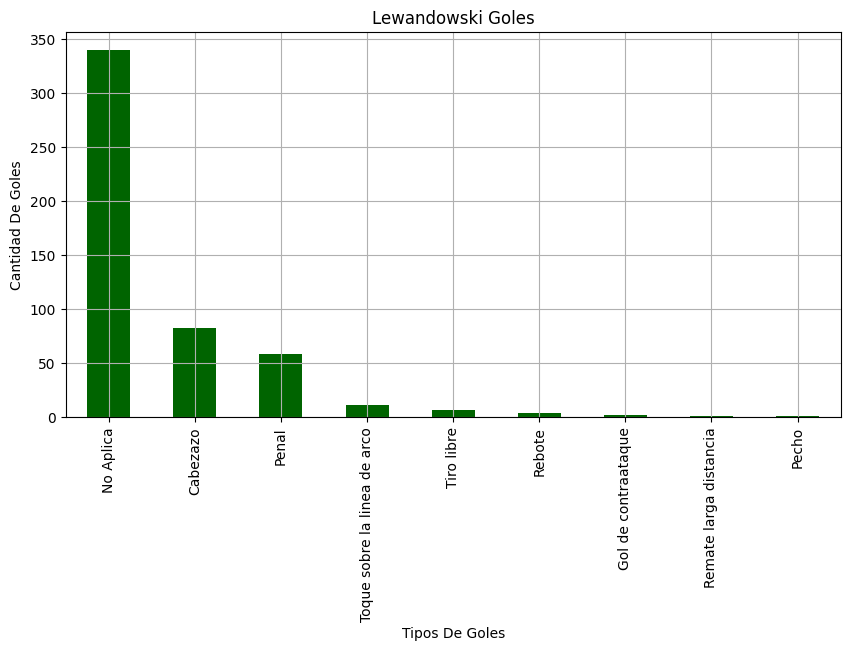

In [79]:
goles.plot(kind='bar', grid='true', title='Lewandowski Goles', xlabel='Tipos De Goles',\
      ylabel='Cantidad De Goles', figsize=(10,5), fontsize=10, color='darkgreen')